# Word- Detection (Augmented_Data)

## Packages

In [4]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
import uuid
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
import importlib
import albumentations as A
import random
import os
import cv2
from sklearn.model_selection import train_test_split

## Utility Functions

In [5]:
from lib import load_data as DL
from lib import tf_DataSet as tf_d
from lib import F_Plots as MyPlot
from lib import IoU as iou
from lib import augmetation as Aug
importlib.reload(DL)
importlib.reload(tf_d) 
importlib.reload(MyPlot) 
importlib.reload(iou)
importlib.reload(Aug) 

<module 'lib.augmetation' from 'C:\\Users\\danil\\TensorFlow\\workspace\\UDEA_Object_Detection_Project\\Notebooks\\lib\\augmetation.py'>

# Load Normal - Data 

In [6]:
Data_Path = "../data/img"
df = DL.xml_to_csv(Data_Path)
df['_xmin'] = df['xmin']/df['width']
df['_ymin'] = df['ymin']/df['height']
df['_xmax'] = df['xmax']/df['width']
df['_ymax'] = df['ymax']/df['height']
_class = {"Logo" : 1 , "Thanks" : 2 , "Total":3 , "Change" : 4}
df["class"] = df["class"].map(_class)

# imporbtlib.reload(DL) 
# dic = {'Formato_1': 1, 'Formato_2': 2 ,'Formato_3': 3}
# Data_Normal = DL.create_and_read_metadata(images_path=  'local/data/imgs' ,medata_path= 'local/data' ,name_file = "metadata_02.csv" ,split_value= 0.7 , labels_dic=dic)

df_a = df[["filename","_xmin","_xmax","_ymin","_ymax","class"]]

df_a.head()

,filename,_xmin,_xmax,_ymin,_ymax,class
0,000.jpg,0.123110,0.719222,0.017769,0.063179,1
1,000.jpg,0.373650,0.667387,0.685094,0.720632,3
2,000.jpg,0.332613,0.738661,0.923001,0.972359,2
3,000.jpg,0.434125,0.652268,0.757157,0.785785,4
4,001.jpg,0.118451,0.854214,0.881474,0.964143,2


In [7]:
df.shape

(533, 12)

## Parametros de Aumento

In [8]:
bbox_params = A.BboxParams(
  format='pascal_voc', 
  min_area=1, 
  min_visibility=0.5, 
  label_fields=['field_id']
)

doc_aug_c = A.Compose([
    A.Flip(p=0.25),
    A.RandomGamma(gamma_limit=(20, 300), p=0.5),
    A.RandomBrightnessContrast(p=0.85),
    A.Rotate(limit=35, p=0.9),
    A.RandomRotate90(p=0.25),
    A.RGBShift(p=0.75),
    A.GaussNoise(p=0.25)
], bbox_params=bbox_params)



In [9]:
importlib.reload(Aug) 

IMAGES_PATH = '../data/img/'
DATASET_PATH = '../data/augmented'
IMAGES_PATH_SAVE = f'{DATASET_PATH}/img'
NAME_FILE = "augmented_v1.csv"

Data_Augmented  = Aug.augmented_fuction(
    img_Aug = 6,
    Data = df_a,
    doc_aug = doc_aug_c,
    DATASET_PATH = DATASET_PATH ,
    IMAGES_PATH_SAVE = IMAGES_PATH_SAVE,
    IMAGES_PATH = IMAGES_PATH,
    NAME_FILE = NAME_FILE
)

100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.23it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 28.85it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.60it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.89it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.19it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.74it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.62it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 13.70it/s]


## Data Augmented

In [10]:
Data_Augmented_P  = Data_Augmented.copy()

In [11]:
Data_Augmented.head()

,filename,xmin,xmax,ymin,ymax,class
0,1_form_aug_0.jpg,118,395,981,1008,1
1,1_form_aug_1.jpg,315,463,0,141,1
2,1_form_aug_2.jpg,0,160,4,119,1
3,1_form_aug_3.jpg,954,1013,0,265,1
4,1_form_aug_4.jpg,53,329,7,30,1


In [12]:
Data_Augmented.shape

(3032, 6)

In [13]:
x_len  = []
y_len = []
for i in Data_Augmented_P.iterrows():
    form = cv2.imread(os.path.join(IMAGES_PATH_SAVE,i[1][0]))
    len_y, len_x , _ = form.shape
    x_len.append(len_x)
    y_len.append(len_y)


In [14]:
Data_Augmented_P["x_len"] = pd.Series(x_len)
Data_Augmented_P["y_len"] = pd.Series(y_len) 

In [15]:
Data_Augmented_P['_xmin'] = Data_Augmented_P['xmin']/Data_Augmented_P['x_len']
Data_Augmented_P['_ymin'] = Data_Augmented_P['ymin']/Data_Augmented_P['y_len']
Data_Augmented_P['_xmax'] = Data_Augmented_P['xmax']/Data_Augmented_P['x_len']
Data_Augmented_P['_ymax'] = Data_Augmented_P['ymax']/Data_Augmented_P['y_len']

Data_Augmented_P

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
0,1_form_aug_0.jpg,118,395,981,1008,1,463,1013,0.254860,0.968411,0.853132,0.995064
1,1_form_aug_1.jpg,315,463,0,141,1,463,1013,0.680346,0.000000,1.000000,0.139191
2,1_form_aug_2.jpg,0,160,4,119,1,463,1013,0.000000,0.003949,0.345572,0.117473
3,1_form_aug_3.jpg,954,1013,0,265,1,1013,463,0.941757,0.000000,1.000000,0.572354
4,1_form_aug_4.jpg,53,329,7,30,1,463,1013,0.114471,0.006910,0.710583,0.029615
...,...,...,...,...,...,...,...,...,...,...,...,...
3027,533_form_aug_1.jpg,398,485,411,463,4,616,1192,0.646104,0.344799,0.787338,0.388423
3028,533_form_aug_2.jpg,380,469,402,446,4,616,1192,0.616883,0.337248,0.761364,0.374161
3029,533_form_aug_3.jpg,397,484,411,462,4,616,1192,0.644481,0.344799,0.785714,0.387584
3030,533_form_aug_4.jpg,219,305,366,420,4,616,1192,0.355519,0.307047,0.495130,0.352349


### Split Data Set

In [16]:
train , test = train_test_split(Data_Augmented_P, shuffle=True)

In [17]:
train

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
1979,348_form_aug_4.jpg,547,704,1082,1184,2,704,1883,0.776989,0.574615,1.000000,0.628784
518,93_form_aug_2.jpg,574,850,1998,2067,2,2481,3508,0.231358,0.569555,0.342604,0.589225
1650,286_form_aug_5.jpg,765,923,1518,1542,4,932,2220,0.820815,0.683784,0.990343,0.694595
2880,507_form_aug_4.jpg,536,636,554,686,4,1929,920,0.277864,0.602174,0.329705,0.745652
441,79_form_aug_4.jpg,130,623,122,240,1,623,1255,0.208668,0.097211,1.000000,0.191235
...,...,...,...,...,...,...,...,...,...,...,...,...
46,9_form_aug_0.jpg,0,61,338,362,3,459,949,0.000000,0.356164,0.132898,0.381454
1334,231_form_aug_1.jpg,0,363,25,329,1,789,1772,0.000000,0.014108,0.460076,0.185666
941,165_form_aug_0.jpg,264,345,270,331,3,619,1203,0.426494,0.224439,0.557351,0.275145
876,153_form_aug_1.jpg,405,470,562,614,4,1080,1527,0.375000,0.368042,0.435185,0.402096


In [18]:
test

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
1822,319_form_aug_3.jpg,388,500,352,415,3,963,2260,0.402908,0.155752,0.519211,0.183628
200,36_form_aug_1.jpg,40,486,508,552,2,604,1716,0.066225,0.296037,0.804636,0.321678
2644,464_form_aug_4.jpg,844,932,1156,1276,3,932,1975,0.905579,0.585316,1.000000,0.646076
864,151_form_aug_1.jpg,498,666,716,814,2,1080,1527,0.461111,0.468893,0.616667,0.533071
1056,184_form_aug_5.jpg,364,591,1272,1351,1,1080,1527,0.337037,0.833006,0.547222,0.884741
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,182_form_aug_1.jpg,441,562,704,773,2,1080,1527,0.408333,0.461035,0.520370,0.506221
1841,323_form_aug_1.jpg,249,438,701,778,2,853,2537,0.291911,0.276311,0.513482,0.306661
2536,446_form_aug_3.jpg,0,412,3,459,1,935,1865,0.000000,0.001609,0.440642,0.246113
231,41_form_aug_4.jpg,291,446,373,481,3,873,1656,0.333333,0.225242,0.510882,0.290459


#  Analysis

## Bounding Box - Coordinates

<AxesSubplot:>

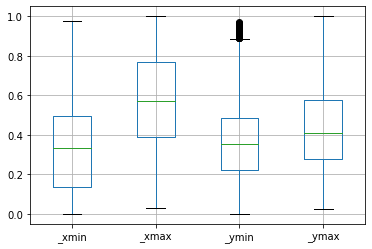

In [19]:
Data_Augmented_P[['_xmin','_xmax','_ymin','_ymax']].boxplot()

In [20]:
train[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax']]

,filename,class,_xmin,_ymin,_xmax,_ymax
1979,348_form_aug_4.jpg,2,0.776989,0.574615,1.000000,0.628784
518,93_form_aug_2.jpg,2,0.231358,0.569555,0.342604,0.589225
1650,286_form_aug_5.jpg,4,0.820815,0.683784,0.990343,0.694595
2880,507_form_aug_4.jpg,4,0.277864,0.602174,0.329705,0.745652
441,79_form_aug_4.jpg,1,0.208668,0.097211,1.000000,0.191235
...,...,...,...,...,...,...
46,9_form_aug_0.jpg,3,0.000000,0.356164,0.132898,0.381454
1334,231_form_aug_1.jpg,1,0.000000,0.014108,0.460076,0.185666
941,165_form_aug_0.jpg,3,0.426494,0.224439,0.557351,0.275145
876,153_form_aug_1.jpg,4,0.375000,0.368042,0.435185,0.402096


In [21]:
importlib.reload(tf_d)

tF_train = tf_d.build_sources_from_metadata(train[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax',]] , os.path.join("..", "data" , "augmented","img"))
tF_test = tf_d.build_sources_from_metadata(test[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax',]] , os.path.join("..", "data" , "augmented","img"))


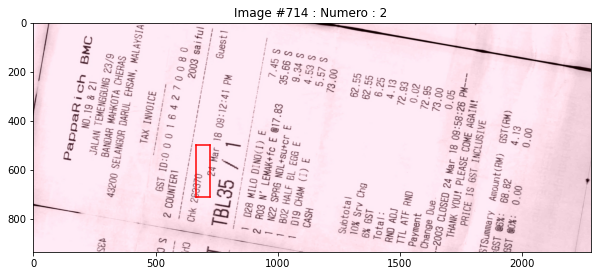

In [22]:
importlib.reload(MyPlot) 
MyPlot.display_random_image(Data_Augmented_P[['filename','_xmin', '_xmax', '_ymin', '_ymax','class']],2,True,image_path = '../data/augmented/img')

## TensorFlow DataSet

In [23]:
tf_Data_train = tf_d.make_tf_dataset(tF_train, training=True,
    batch_size=4, num_epochs=1,
    num_parallel_calls=2)

tf_Data_test = tf_d.make_tf_dataset(tF_test, training=True,
    batch_size=1, num_epochs=1,
    num_parallel_calls=2)

##### Image Plot with bounding box

[0.7769886 1.        0.574615  0.6287839]
176.3764179944992
227.0
[0.         0.14850427 0.32807708 0.3543583 ]
0.0
33.710469767451286
[0.37848607 0.42729083 0.13439636 0.87243736]
85.91633722186089
96.99501773715019
[0.5987193 0.773746  0.6448276 0.68     ]
135.90928083658218
175.64034509658813


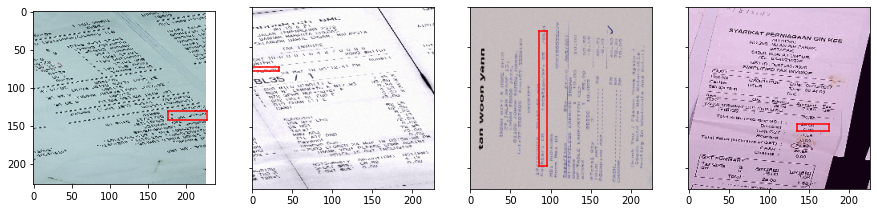

In [26]:
importlib.reload(MyPlot) 
dataset = iter(tf_Data_train)
MyPlot.imshow_batch_of_three(next(dataset),show_box=True, num_images = 4)

# Modelling


In [28]:
# Define a simple sequential model
def create_model():
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(227,227,3)))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=4, activation = 'sigmoid'))
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(0.0001))

    return model

In [29]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 44944)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5393400   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

##### Evaluate DataSet

In [30]:
print(model.evaluate(tf_Data_train))

569/569 [==============================] - 12s 17ms/step - loss: 0.0609
0.060908857733011246


## Fit Model

In [31]:
H = model.fit(x=tf_Data_train, epochs=100,validation_data=tf_Data_test, validation_steps=1)

Epoch 1/100
569/569 [==============================] - 11s 18ms/step - loss: 0.0615 - val_loss: 0.1482
Epoch 2/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0544 - val_loss: 0.0366
Epoch 3/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0545 - val_loss: 0.0083
Epoch 4/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0545 - val_loss: 0.0311
Epoch 5/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0546 - val_loss: 0.0077
Epoch 6/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0545 - val_loss: 0.0083
Epoch 7/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0546 - val_loss: 0.0371
Epoch 8/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0548 - val_loss: 0.0371
Epoch 9/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0545 - val_loss: 0.1388
Epoch 10/100
569/569 [==============================] - 10s 18ms/step - l

Epoch 80/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 81/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 82/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0015 - val_loss: 0.0083
Epoch 83/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 84/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 85/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0013 - val_loss: 0.1539
Epoch 86/100
569/569 [==============================] - 10s 17ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 87/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 88/100
569/569 [==============================] - 10s 18ms/step - loss: 0.0013 - val_loss: 0.1963
Epoch 89/100
569/569 [==============================] - 10s 17ms

# Evaluate Results

## Plot training loss

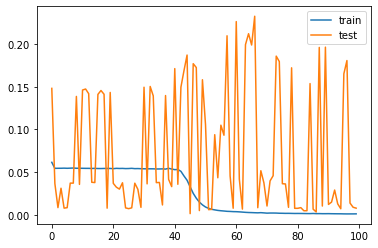

In [32]:
plt.subplot(1,1,1)
plt.plot(H.history['loss'],label='train')
plt.plot(H.history['val_loss'],label='test')
plt.legend()

## Intersection over Union

In the simplest case, segmentation is the process of dividing a digital image into several segments. The result of instance segmentation using Mask R-CNN is a mask applied to the desired object and a bounding box around this object.

[Intersection over union](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=What%20is%20Intersection%20over%20Union,the%20popular%20PASCAL%20VOC%20challenge.) (IoU) is known to be a good metric for measuring overlap between two bounding boxes or masks.

<img src="https://miro.medium.com/max/423/1*2w493Z_V6-sE_3aYa48a9w.png" style="width:40%;">

If the prediction is completely correct, IoU = 1. The lower the IoU, the worse the prediction result.

<img src="https://miro.medium.com/max/646/1*eF0J8KcQqJQF3N0J1vmKwA.png" style="width:40%;">

## Plot Predictions

In [126]:
Data_Predict= model.predict(tf_Data_test)

In [127]:
Data_Predict.shape

(754, 4)

In [128]:
Data_Predict

array([[0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       ...,
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ]], dtype=float32)

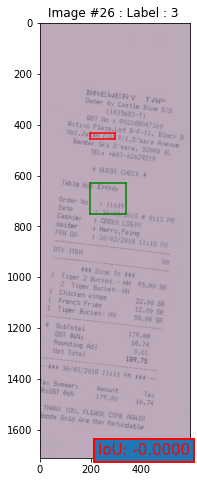

In [132]:
importlib.reload(MyPlot) 
MyPlot.display_random_image_Pre(test[["filename","_xmin","_xmax","_ymin","_ymax","class"]],Data_Predict , image_path='../data/augmented/img')

# Save Model

In [133]:
tf.saved_model.save(model, "../models/Custom_Models/Augmented/")


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ../models/Custom_Models/Augmented/assets
